In [2]:
import numpy as np

In [7]:
def bayes_rule(priors,likelihood):
    marg=sum(np.multiply(priors,likelihood))
    post=np.divide(np.multiply(priors,likelihood),marg)
    return post

In [8]:
probas=[1/3,1/3,1/3]
likelihood=[0.4,0.6,0.3]
bayes_rule(probas,likelihood)

array([0.30769231, 0.46153846, 0.23076923])

In [13]:
likelihood_red=[0.2,0.25,0.18]
bayes_rule(probas,likelihood_red)

array([0.31746032, 0.3968254 , 0.28571429])

# Online store example

In [15]:
import pandas as pd

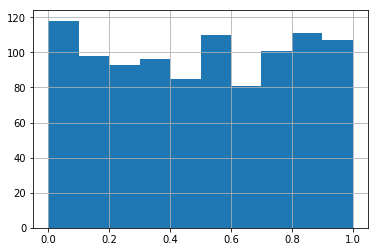

In [17]:
n_draws=1000
prior=pd.Series(np.random.uniform(0,1,size=n_draws))
prior.hist()

In [20]:
def generative_model(param):
    result=np.random.binomial(50,param)#50 visitors
    return result

In [21]:
observed=10 #10 people registerd to my webpage

In [22]:
sim_data=[]
for p in prior:
    sim_data.append(generative_model(p))

In [24]:
print(sim_data)

[15, 31, 2, 41, 14, 41, 48, 26, 42, 5, 19, 9, 23, 17, 13, 37, 8, 6, 49, 37, 2, 3, 27, 31, 46, 35, 28, 34, 43, 2, 49, 13, 34, 17, 12, 44, 45, 13, 8, 21, 34, 27, 25, 33, 49, 0, 46, 40, 6, 8, 5, 9, 14, 40, 43, 22, 29, 8, 31, 33, 32, 7, 28, 50, 49, 1, 1, 21, 3, 39, 30, 1, 40, 34, 4, 46, 6, 9, 50, 44, 37, 47, 28, 21, 7, 20, 18, 9, 9, 39, 36, 26, 47, 2, 31, 47, 21, 24, 33, 8, 41, 38, 28, 15, 2, 6, 20, 29, 40, 15, 30, 26, 32, 18, 33, 44, 26, 33, 48, 3, 44, 30, 15, 26, 5, 31, 6, 27, 30, 20, 31, 38, 4, 0, 48, 2, 49, 31, 40, 27, 28, 29, 44, 49, 43, 37, 0, 24, 25, 28, 37, 6, 38, 21, 6, 25, 35, 34, 9, 8, 43, 46, 6, 6, 14, 12, 16, 15, 46, 13, 48, 32, 20, 37, 50, 19, 32, 14, 36, 41, 10, 33, 36, 38, 41, 1, 27, 15, 47, 18, 3, 32, 47, 38, 10, 7, 50, 30, 29, 44, 9, 11, 13, 24, 0, 1, 15, 20, 43, 14, 19, 37, 34, 46, 47, 49, 2, 45, 50, 9, 48, 3, 29, 10, 41, 12, 38, 45, 26, 16, 21, 25, 45, 15, 25, 44, 2, 27, 45, 10, 25, 0, 19, 23, 50, 25, 9, 33, 25, 13, 5, 2, 33, 0, 4, 21, 27, 8, 50, 48, 21, 15, 14, 25, 34,

In [25]:
posterior=prior[list(map(lambda X: X==observed,sim_data))]
posterior

180    0.188791
194    0.193612
223    0.182296
239    0.089434
420    0.357787
576    0.226241
637    0.138930
845    0.219695
988    0.245940
dtype: float64

In [26]:
posterior.describe()

count    9.000000
mean     0.204747
std      0.074427
min      0.089434
25%      0.182296
50%      0.193612
75%      0.226241
max      0.357787
dtype: float64

In [27]:
print(posterior.quantile(0.05),'|',posterior.quantile(0.95))

0.10923221330306274 | 0.3130483023211962


# Maximum LIkehood estimator

In [29]:
rounded=posterior.round(2)
mode=rounded.mode()[0]
mode

0.19

In [30]:
probability=list(rounded).count(mode)/len(rounded)
print('MLE = ',mode,"|",probability)

MLE =  0.19 | 0.2222222222222222
